<a href="https://colab.research.google.com/github/Sheilaro24/Poryectos-web/blob/main/Ejemplo_de_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ejemplo de regresion linean usando TensorFlow**

In [ ]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.python.framework import ops


In [ ]:
#crear conjuntos de datos para un modelo basado en regresion lineal tenemos lo que se llama aprendizaje supervisado
#hay que tener un conjunto de entrenamientos para enseñar a nuestro modelo como debe trabajar
#y un conjunto de test para poder proar si el modelo es bueno
#el mnist para clasificar tecto a mano
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
ops.reset_default_graph()


In [ ]:
#crear unos cuantos valores a mano
X = np.array([3.3,4.4,5.5,6.93,4.18,7.59,3.1])
Y = np.array([1.7,2.6,2.0,3.19,5.41,2.5,1.22])

In [ ]:
#usar random para generar valores aleatorios para lo pesos y el bias (funcion de ajuste a nivel interno)
rng = np.random

In [ ]:
#como en estos modelos hay que inicializar los pesos y los bias, que a nivel interno se usan Tensores(vector)
#hay varias estrategias, vamos a lo facil
W = tf.Variable(rng.random(), name = "weight")
B = tf.Variable(rng.random(), name = "bias")

In [ ]:
#mates de cole, en Tensorflow la regresin lienal soporta cualquie funcion, debemos definir la ecuaciono de la funcion
#en nuestro caso quetrmos montar una recta
def linear_regression(x):
  return W * x + B

In [ ]:
#hya que definir la funcin de reduccion de error, que es la que permitira ajustar los pesos y el bias
 #para que el sistema ajuste mejor la recta
 #en este caos queremos reducir el error cuadratico medio
def mean_square(y_pred, y_true):
  return tf.reduce_mean(tf.square(y_pred - y_true))


In [ ]:
#el siguiente paso es el elestocastico, que es la funcion que va a optimizar
#el concepto clave es la tasa de aprendizaje o learning rate (como de rapido queremos que aprenda)
learning_rate=0.01 #mejor valores pequeños, se aprende mas despacio pero se obtienen mejores resultados, valores grandes mas rapidos pero pueden ser menos preciosos



In [ ]:
from tensorflow.keras import optimizers
optimizer = optimizers.SGD(learning_rate)

In [ ]:
#el siguiente paso es realizar la optimizacion del modelo
def run_optimizations():
  with tf.GradientTape() as g:
    pred = linear_regression(X)
    loss = mean_square(pred, Y)
    #Se ajustan los gradientes (que es la pendiente de la recta)
    gradients = g.gradient(loss, [W,B])
    #se optimiza
    optimizer.apply_gradients(zip(gradients, [W,B]))


In [ ]:
#ahora hay que entrenar el modelo
#hay que definir cuantos pasos queremos que tenga nuestro entrenamiento
training_steps=10000
# definir caca cuentos entrenos quiero que me informe
display_step=100

for step in range (1, training_steps+1):
  #en cada iteración se llama al optimizdor
  run_optimizations()
  #se imprime el reultado del entreno cada 100 veces
  if step % display_step == 0:
    pred= linear_regression(X)
    loss = mean_square(pred, Y)
    print("Paso: ", step, " Error cuadratico medio es: " , loss, " Bias: " , B.numpy(), "Peso: ", W.numpy())


Paso:  100  Error cuadratico medio es:  tf.Tensor(1.7584817, shape=(), dtype=float32)  Bias:  0.5743827 Peso:  0.39121574
Paso:  200  Error cuadratico medio es:  tf.Tensor(1.7003471, shape=(), dtype=float32)  Bias:  0.81138676 Peso:  0.34814122
Paso:  300  Error cuadratico medio es:  tf.Tensor(1.6600071, shape=(), dtype=float32)  Bias:  1.0088137 Peso:  0.31225964
Paso:  400  Error cuadratico medio es:  tf.Tensor(1.6320149, shape=(), dtype=float32)  Bias:  1.1732728 Peso:  0.28236988
Paso:  500  Error cuadratico medio es:  tf.Tensor(1.6125908, shape=(), dtype=float32)  Bias:  1.3102694 Peso:  0.25747132
Paso:  600  Error cuadratico medio es:  tf.Tensor(1.5991124, shape=(), dtype=float32)  Bias:  1.4243886 Peso:  0.2367306
Paso:  700  Error cuadratico medio es:  tf.Tensor(1.5897596, shape=(), dtype=float32)  Bias:  1.5194517 Peso:  0.21945328
Paso:  800  Error cuadratico medio es:  tf.Tensor(1.5832694, shape=(), dtype=float32)  Bias:  1.59864 Peso:  0.20506114
Paso:  900  Error cuadrati

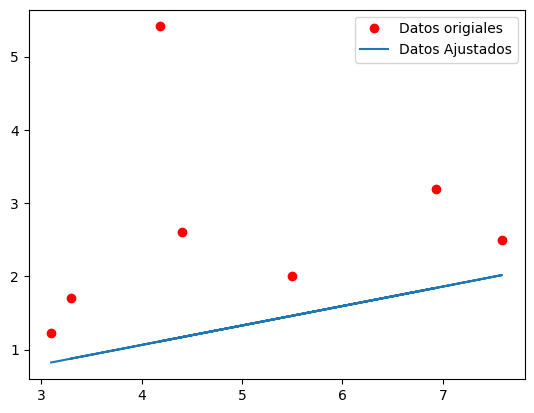

In [ ]:
#vamos a crar un grafico para ver la recta y los puntos
plt.plot(X,Y, 'ro', label="Datos origiales")
plt.plot(X, np.array(W*X*B), label= "Datos Ajustados")
plt.legend()
plt.show()